In [1]:
!nvidia-smi

Sun Jul 30 09:50:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pwd

/content


In [3]:
ROOT = "/content/drive/MyDrive/DeepLearning"

In [4]:
import os
os.chdir(ROOT)

In [5]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [9]:
X  = pd.DataFrame(housing.data, columns=housing.feature_names)

In [10]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
y = pd.DataFrame(housing.target, columns=["target"])
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [13]:
X.shape

(20640, 8)

In [14]:
y.shape

(20640, 1)

In [15]:
X_train_full, X_test , y_train_full, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [16]:
X_train_full.shape

(16512, 8)

In [17]:
X_test.shape

(4128, 8)

In [18]:
X_train, X_valid , y_train, y_valid = train_test_split(X_train_full,y_train_full, test_size=0.2, random_state=42)

In [19]:
X_train.shape

(13209, 8)

In [21]:
X_valid.shape

(3303, 8)

In [22]:
X_train.shape[1:]

(8,)

In [23]:
LAYERS=[
    tf.keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
]

In [24]:
model = tf.keras.models.Sequential(LAYERS)

In [26]:
# # For calculating accuracy score (r2 score)
# from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [27]:
LOSS = 'mse'
OPTIMIZER= 'sgd'
model.compile(optimizer= OPTIMIZER, loss= LOSS, metrics=[coeff_determination])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [31]:
history = model.fit(X_train,y_train, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
413/413 [==============================] - 2s 5ms/step - loss: 0.3081 - coeff_determination: 0.7507 - val_loss: 0.3331 - val_coeff_determination: 0.7393
Epoch 2/20
413/413 [==============================] - 2s 4ms/step - loss: 0.3078 - coeff_determination: 0.7518 - val_loss: 0.3571 - val_coeff_determination: 0.7230
Epoch 3/20
413/413 [==============================] - 2s 5ms/step - loss: 0.3049 - coeff_determination: 0.7555 - val_loss: 0.3494 - val_coeff_determination: 0.7264
Epoch 4/20
413/413 [==============================] - 2s 6ms/step - loss: 0.3034 - coeff_determination: 0.7535 - val_loss: 0.3372 - val_coeff_determination: 0.7326
Epoch 5/20
413/413 [==============================] - 2s 4ms/step - loss: 0.3025 - coeff_determination: 0.7545 - val_loss: 0.3278 - val_coeff_determination: 0.7455
Epoch 6/20
413/413 [==============================] - 2s 5ms/step - loss: 0.3021 - coeff_determination: 0.7555 - val_loss: 0.3343 - val_coeff_determination: 0.7387
Epoch 7/20
413/4

<Axes: >

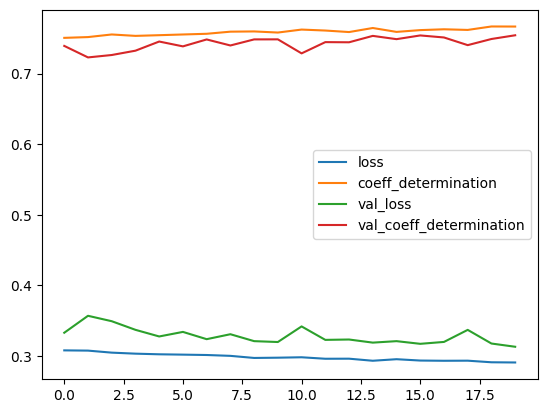

In [33]:
pd.DataFrame(history.history).plot()

In [34]:
new = X_test[0]
new

array([-1.15763869, -0.28336379, -0.57962896, -0.18908216, -0.03070471,
        0.12364657,  0.19362619,  0.28590977])

In [35]:
new.shape

(8,)

In [36]:
model.predict(new.reshape(1,8))

1/1 [==============================] - 0s 127ms/step


array([[0.78239715]], dtype=float32)

In [37]:
model.evaluate(X_test,y_test)

129/129 [==============================] - 0s 3ms/step - loss: 0.3048 - coeff_determination: 0.7471


[0.30478182435035706, 0.7471054792404175]

In [39]:
y_test

,target
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
15362,2.63300
16623,2.66800
18086,5.00001
2144,0.72300
